In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selection

In [16]:
fps = pd.read_csv('fps.csv')
rank_tournament = pd.read_csv('rank_tournament.csv')
roulette = pd.read_csv('random_mutate_blend.csv')
ranking = pd.read_csv('ranking.csv')

In [17]:
select_df = pd.concat([fps, rank_tournament, roulette, ranking])
select_df.head()

run  generation    fitness mutation_method xo_method selection_method
0    0           0  66.836952   random_mutate  blend_xo              fps
1    0           1  63.475330   random_mutate  blend_xo              fps
2    0           2  60.815773   random_mutate  blend_xo              fps
3    0           3  60.225892   random_mutate  blend_xo              fps
4    0           4  59.721537   random_mutate  blend_xo              fps

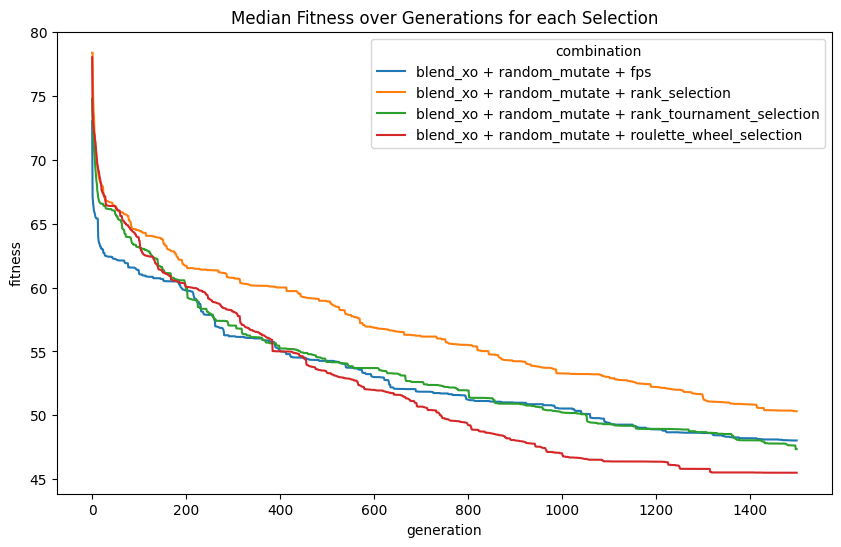

In [18]:
df_grouped = select_df.groupby(['xo_method', 'mutation_method', 'selection_method', 'generation'])['fitness'].median().reset_index()
df_grouped['combination'] = df_grouped['xo_method'] + ' + ' + df_grouped['mutation_method'] + ' + ' + df_grouped['selection_method']

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='generation', y='fitness', hue='combination')
plt.title('Median Fitness over Generations for each Selection')
plt.show()

# Xo and Mutation

In [2]:
rand_patch = pd.read_csv('random_mutate_patch_xo_fitness_values.csv')
inter_patch = pd.read_csv('interpolate_color_mutation_patch_xo_fitness_values.csv')
rand_blend = pd.read_csv('random_mutate_blend.csv')
inter_blend = pd.read_csv('interpolate_color_mutation_blend.csv')
rand_per_channel = pd.read_csv('random_mutate_per_channel_crossover_fitness_values.csv')
inter_per_channel = pd.read_csv('interpolate_color_mutation_per_channel_crossover_fitness_values.csv')
rand_per_channel2 = pd.read_csv('random_mutate_per_channel_crossover_2_fitness_values.csv')
inter_per_channel2 = pd.read_csv('interpolate_color_mutation_per_channel_crossover_2_fitness_values.csv')

In [3]:
concat_df = pd.concat([rand_patch, inter_patch, rand_blend, inter_blend, rand_per_channel, 
                       inter_per_channel, rand_per_channel2, inter_per_channel2])
concat_df.head()

run  generation    fitness mutation_method xo_method  \
0    0           0  57.678257   random_mutate  patch_xo   
1    0           1  57.425007   random_mutate  patch_xo   
2    0           2  56.168409   random_mutate  patch_xo   
3    0           3  54.782788   random_mutate  patch_xo   
4    0           4  53.904005   random_mutate  patch_xo   

           selection_method  
0  roulette_wheel_selection  
1  roulette_wheel_selection  
2  roulette_wheel_selection  
3  roulette_wheel_selection  
4  roulette_wheel_selection

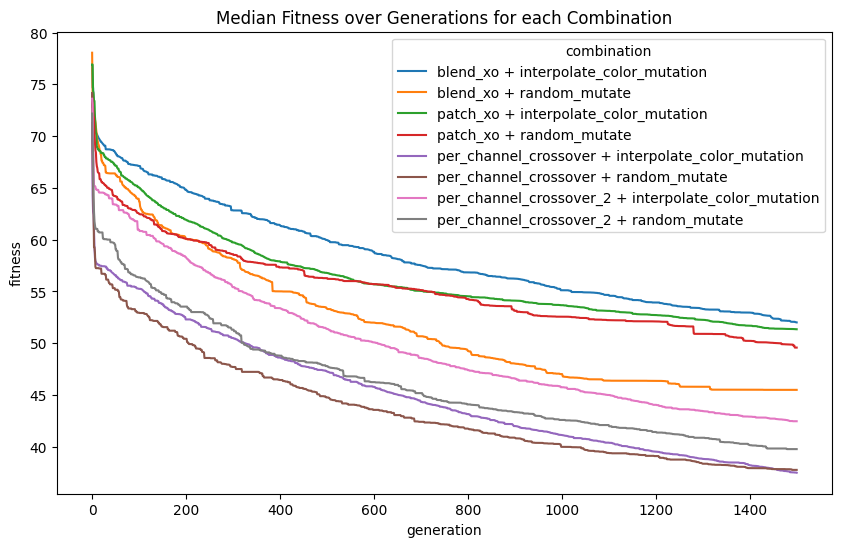

In [4]:
df_grouped = concat_df.groupby(['xo_method', 'mutation_method', 'generation'])['fitness'].median().reset_index()
df_grouped['combination'] = df_grouped['xo_method'] + ' + ' + df_grouped['mutation_method']

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='generation', y='fitness', hue='combination')
plt.title('Median Fitness over Generations for each Combination')
plt.show()

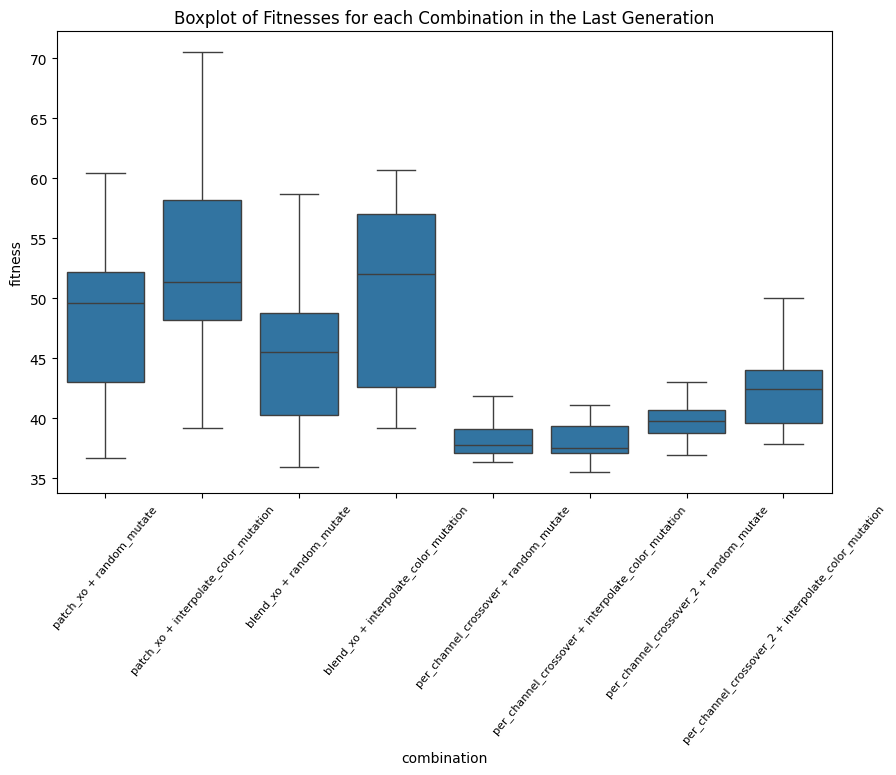

In [8]:
last_gen_df = concat_df[concat_df['generation'] == 1499].copy()
last_gen_df['combination'] = last_gen_df['xo_method'] + ' + ' + last_gen_df['mutation_method']

plt.figure(figsize=(10, 6))
sns.boxplot(data=last_gen_df, x='combination', y='fitness')
plt.title('Boxplot of Fitnesses for each Combination in the Last Generation')
plt.xticks(rotation=50)
plt.tick_params(axis='x', labelsize=8)
plt.show()


In [6]:
variance_df = last_gen_df.groupby('combination')['fitness'].var().reset_index()
variance_df.columns = ['Combination', 'Variance of Fitness']
sorted_variance_df = variance_df.sort_values('Variance of Fitness')
print(sorted_variance_df)


                                         Combination  Variance of Fitness
5              per_channel_crossover + random_mutate             2.199031
4  per_channel_crossover + interpolate_color_muta...             2.467392
7            per_channel_crossover_2 + random_mutate             2.809539
6  per_channel_crossover_2 + interpolate_color_mu...            13.005323
3                           patch_xo + random_mutate            37.425397
1                           blend_xo + random_mutate            37.767581
0              blend_xo + interpolate_color_mutation            58.544510
2              patch_xo + interpolate_color_mutation            88.268894


# Elitism

In [36]:
outer_false_inner_false = pd.read_csv('random_mutate_per_channel_crossover_elistim_False_inner_elitism_False_fitness_values.csv')
outer_true_inner_false = pd.read_csv('random_mutate_per_channel_crossover_elistim_True_inner_elitism_False_fitness_values.csv')
outer_true_inner_true = pd.read_csv('random_mutate_per_channel_crossover_fitness_values.csv')
outer_false_inner_true = pd.read_csv('random_mutate_per_channel_crossover_elistim_False_inner_elitism_True_fitness_values.csv')

In [37]:
outer_false_inner_false['Outer_Elitism'] = False
outer_false_inner_false['Inner_Elitism'] = False
outer_true_inner_false['Outer_Elitism'] = True
outer_true_inner_false['Inner_Elitism'] = False
outer_true_inner_true['Outer_Elitism'] = True
outer_true_inner_true['Inner_Elitism'] = True
outer_false_inner_true['Outer_Elitism'] = False
outer_false_inner_true['Inner_Elitism'] = True

In [38]:
concat_df = pd.concat([outer_false_inner_false, outer_true_inner_false, outer_true_inner_true, outer_false_inner_true])
concat_df.head()

run  generation    fitness mutation_method              xo_method  \
0    0           0  79.211999   random_mutate  per_channel_crossover   
1    0           1  79.989981   random_mutate  per_channel_crossover   
2    0           2  77.045068   random_mutate  per_channel_crossover   
3    0           3  72.739790   random_mutate  per_channel_crossover   
4    0           4  71.372377   random_mutate  per_channel_crossover   

           selection_method  Outer_Elitism  Inner_Elitism  
0  roulette_wheel_selection          False          False  
1  roulette_wheel_selection          False          False  
2  roulette_wheel_selection          False          False  
3  roulette_wheel_selection          False          False  
4  roulette_wheel_selection          False          False

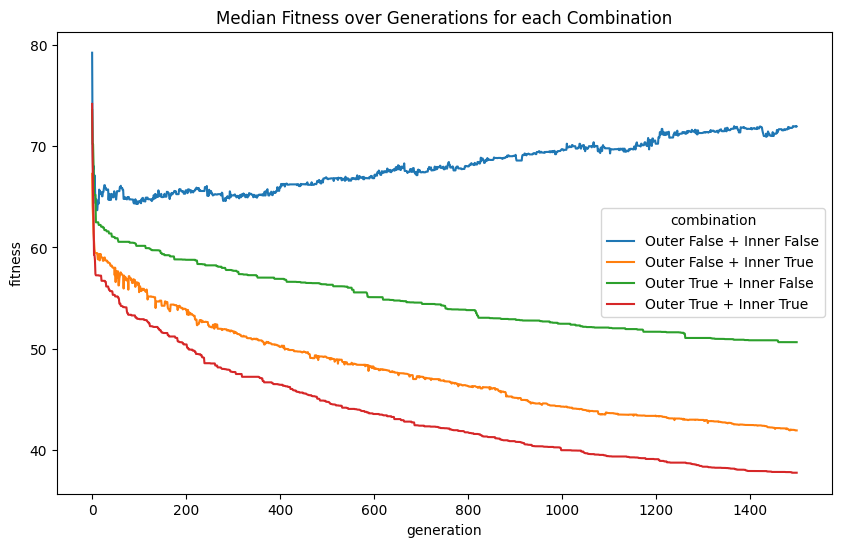

In [39]:
df_grouped = concat_df.groupby(['Outer_Elitism', 'Inner_Elitism', 'generation'])['fitness'].median().reset_index()
df_grouped['combination'] = 'Outer ' + df_grouped['Outer_Elitism'].astype(str) + ' + ' + 'Inner ' + df_grouped['Inner_Elitism'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='generation', y='fitness', hue='combination')
plt.title('Median Fitness over Generations for each Combination')
plt.show()

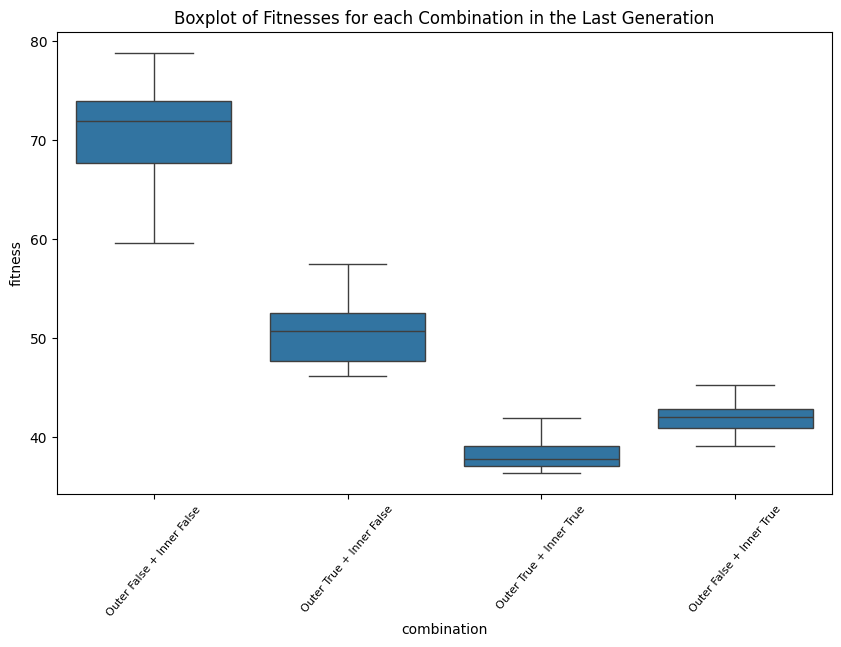

In [40]:
last_gen_df = concat_df[concat_df['generation'] == 1499].copy()
last_gen_df['combination'] = 'Outer ' + last_gen_df['Outer_Elitism'].astype(str) + ' + ' + 'Inner ' + last_gen_df['Inner_Elitism'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(data=last_gen_df, x='combination', y='fitness')
plt.title('Boxplot of Fitnesses for each Combination in the Last Generation')
plt.xticks(rotation=50)
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [41]:
variance_df = last_gen_df.groupby('combination')['fitness'].var().reset_index()
variance_df.columns = ['Combination', 'Variance of Fitness']
sorted_variance_df = variance_df.sort_values('Variance of Fitness')
print(sorted_variance_df)

                 Combination  Variance of Fitness
3    Outer True + Inner True             2.199031
1   Outer False + Inner True             2.611556
2   Outer True + Inner False            10.057105
0  Outer False + Inner False            26.227328


# Parameter Tunning

In [2]:
prob_08_01 = pd.read_csv('0.8-0.1.csv')
prob_08_015 = pd.read_csv('random_mutate_per_channel_crossover_fitness_values.csv')
prob_09_015 = pd.read_csv('xo_prob_0.9mut_prob0.15_fitness_values.csv')
prob_075_015 = pd.read_csv('xo_prob_0.75_mut_prob_0.15_fitness_values.csv')
prob_09_01 = pd.read_csv('xo_prob_0.9mut_prob0.1_fitness_values.csv')
prob_075_01 = pd.read_csv('xo_prob_0.75_mut_prob_0.1_fitness_values.csv')
prob_085_015 = pd.read_csv('xo_prob_0.85_mut_prob_0.15_fitness_values.csv')
prob_085_01 = pd.read_csv('xo_prob_0.85_mut_prob_0.1_fitness_values.csv')

In [3]:
prob_08_01['xo_prob'] = 0.8
prob_08_01['mut_prob'] = 0.1
prob_08_015['xo_prob'] = 0.8
prob_08_015['mut_prob'] = 0.15
prob_09_015['xo_prob'] = 0.9
prob_09_015['mut_prob'] = 0.15
prob_075_015['xo_prob'] = 0.75
prob_075_015['mut_prob'] = 0.15
prob_09_01['xo_prob'] = 0.9
prob_09_01['mut_prob'] = 0.1
prob_075_01['xo_prob'] = 0.75
prob_075_01['mut_prob'] = 0.1
prob_085_015['xo_prob'] = 0.85
prob_085_015['mut_prob'] = 0.15
prob_085_01['xo_prob'] = 0.85
prob_085_01['mut_prob'] = 0.1

In [5]:
concat_df = pd.concat([prob_08_01, prob_08_015, prob_09_015, prob_075_015, prob_09_01, prob_075_01, prob_085_015, prob_085_01])
concat_df.head()

run  generation    fitness mutation_method              xo_method  \
0    0           0  68.122277   random_mutate  per_channel_crossover   
1    0           1  68.122277   random_mutate  per_channel_crossover   
2    0           2  65.777378   random_mutate  per_channel_crossover   
3    0           3  63.359276   random_mutate  per_channel_crossover   
4    0           4  63.359276   random_mutate  per_channel_crossover   

           selection_method  xo_prob  mut_prob  
0  roulette_wheel_selection      0.8       0.1  
1  roulette_wheel_selection      0.8       0.1  
2  roulette_wheel_selection      0.8       0.1  
3  roulette_wheel_selection      0.8       0.1  
4  roulette_wheel_selection      0.8       0.1

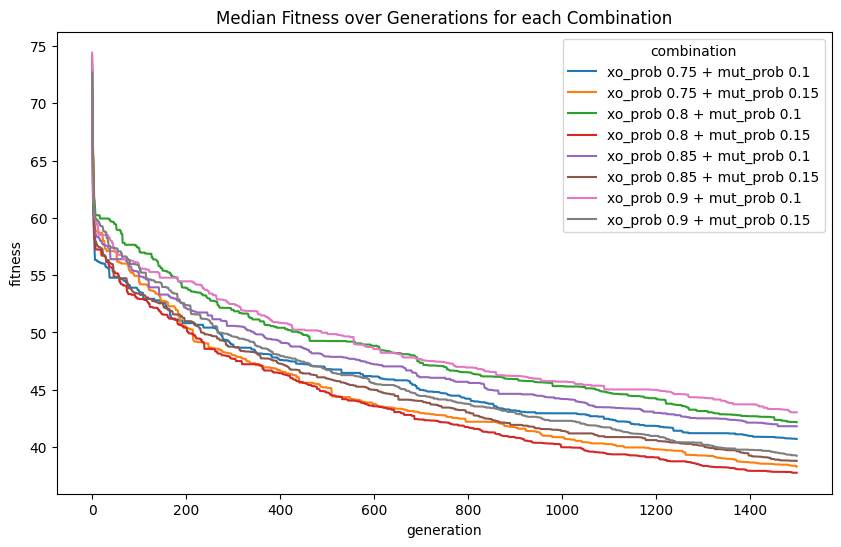

In [6]:
df_grouped = concat_df.groupby(['xo_prob', 'mut_prob', 'generation'])['fitness'].median().reset_index()
df_grouped['combination'] = 'xo_prob ' + df_grouped['xo_prob'].astype(str) + ' + ' 'mut_prob ' + df_grouped['mut_prob'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='generation', y='fitness', hue='combination')
plt.title('Median Fitness over Generations for each Combination')
plt.show()

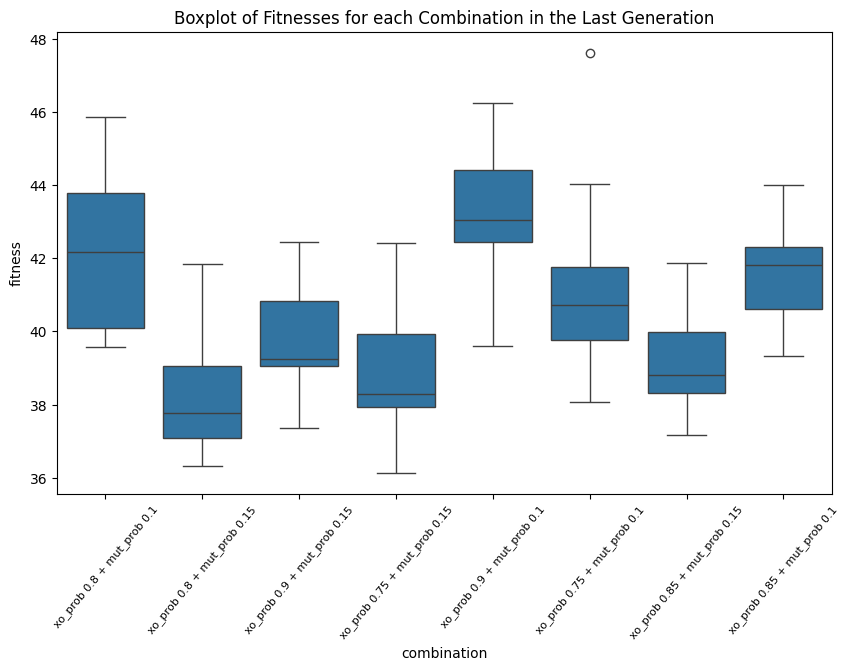

In [7]:
last_gen_df = concat_df[concat_df['generation'] == 1499].copy()
last_gen_df['combination'] = 'xo_prob ' + last_gen_df['xo_prob'].astype(str) + ' + ' 'mut_prob ' + last_gen_df['mut_prob'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(data=last_gen_df, x='combination', y='fitness')
plt.title('Boxplot of Fitnesses for each Combination in the Last Generation')
plt.xticks(rotation=50)
plt.tick_params(axis='x', labelsize=8)
plt.show()


In [8]:
variance_df = last_gen_df.groupby('combination')['fitness'].var().reset_index()
variance_df.columns = ['Combination', 'Variance of Fitness']
sorted_variance_df = variance_df.sort_values('Variance of Fitness')
print(sorted_variance_df)

                    Combination  Variance of Fitness
5  xo_prob 0.85 + mut_prob 0.15             1.774759
4   xo_prob 0.85 + mut_prob 0.1             1.955011
7   xo_prob 0.9 + mut_prob 0.15             2.193883
3   xo_prob 0.8 + mut_prob 0.15             2.199031
1  xo_prob 0.75 + mut_prob 0.15             3.137913
6    xo_prob 0.9 + mut_prob 0.1             3.624435
2    xo_prob 0.8 + mut_prob 0.1             4.424215
0   xo_prob 0.75 + mut_prob 0.1             5.953461
